## Esercitazione 9   del   15  Aprile 2025


## Metodi iterativi di Jacobi, Guass-Seidel e Gausseidel_SOR per la soluzione numerica di un sistema lineare

In [1]:
import numpy as np
import sympy as sim
import scipy as sp
import matplotlib.pyplot as plt

## Esercizio 1
Implementare la  funzione $jacobi(A,b,x0,toll,itmax)$ per risolvere il  sistema lineare Ax=b utilizzando il Metodo iterativo di Jacobi. 
La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- toll: tolleranza per il criterio di arresto
- itmax: iterazioni massime oltre le quali il metodo si ferma

Restituisce in output
- la soluzione x
- l'errore ad ogni iterazione calcolato come $||x^{(k)}-x^{(k-1)}||/||x^{(k)}||$

Calcola
- d= np.diag(A) #Estrae la diagonale di A in un 1d numpy array
- D=np.diag(d) #Costruisce la matrice diagonale avente d come elementi della diagonale.
- E=np.tril(A,-1) #Costruisce la matrice E, formata dagli elementi della matrice A sotto la diagonale 
                 principale esclusi gli elementi diagonali (vedi teoria)
- F=np.triu(A,1) #Costruisce la matrice F, formata dagli elementi della matrice A sopra la diagonale 
                 principale esclusi gli elementi diagonali (vedi teoria)
- il raggio spettrale della matrice di iterazione $T=-D^{(-1)}(E+F)$ e la norma infinito della stessa matrice e li stampa

- Implementare in formato  matriciale, l'aggiornamento della soluzione ad ogni iterazione:

$$x^{(k)}=D^{(-1)}(b-(E+F)x^{(k-1)})$$

Implementare un criterio di arresto per il procedimento iterativo in termini di : $||x^{(k)}-x^{(k-1)}||/||x^{(k)}|| <toll$

In [2]:
def jacobi(A, b, x0, toll, itmax):
    errors = []
    x_curr, x_prev = None, x0
    stop = False

    d = np.diag(A)

    # Matrix 'A' decomposition: A = D + E + F 
    D = np.diag(d)
    E = np.tril(A, -1)
    F = np.triu(A, 1)

    # In iterative methods, A is generally decomposed in
    # M and N such that A = M - N
    M = D
    N = -(E + F)

    # General iterative step:
    # x_k = T @ x_{k-1} + q
    T = np.linalg.inv(M) @ N
    q = np.linalg.inv(M) @ b

    spectral_ray = np.max(np.linalg.eigvals(T))
    print(f"Raggio spettrale di T: {spectral_ray}")
    
    infty_norm = np.linalg.norm(T, ord=np.inf)
    print(f"Norma ad infinito di T: {infty_norm}")
    
    while not stop:
        x_curr = T @ x_prev + q
        error_curr = np.linalg.norm(x_curr - x_prev, np.inf) / np.linalg.norm(x_curr, np.inf)
        errors.append(error_curr)
        if error_curr < toll or len(errors) > itmax:
            stop = True
        else:
            x_prev = x_curr

    return x_curr, errors

A = np.array([
    [8,1,3],
    [3,5,1],
    [1,1,17]
], dtype=float)
b = np.sum(A, axis=1)
x0 = np.zeros(A.shape[0])
toll = 1e-8

jacobi(A, b, x0, toll, 10_000)

Raggio spettrale di T: (0.19180638408529346+0.039313324914851094j)
Norma ad infinito di T: 0.8


(array([1., 1., 1.]),
 [np.float64(1.0),
  np.float64(1.2165605095541403),
  np.float64(0.38601174586225323),
  np.float64(0.15024729547877463),
  np.float64(0.06182566324505953),
  np.float64(0.022474088871106454),
  np.float64(0.009000192731428503),
  np.float64(0.0033663933363902417),
  np.float64(0.0013113309785329583),
  np.float64(0.0004989526366101405),
  np.float64(0.00019223951094641376),
  np.float64(7.358756722412082e-05),
  np.float64(2.8258368797051125e-05),
  np.float64(1.0835229407535029e-05),
  np.float64(4.15735954168386e-06),
  np.float64(1.594694728692114e-06),
  np.float64(6.117604503410529e-07),
  np.float64(2.3467800468382782e-07),
  np.float64(9.002533116314728e-08),
  np.float64(3.453496729836162e-08),
  np.float64(1.3248021631018256e-08),
  np.float64(5.08211906063155e-09)])

## Esercizio 2
Implementare la  funzione $gauss$_$seidel(A,b,x0,toll,itmax)$ per risolvere il  sistema lineare Ax=b utilizzando il Metodo iterativo di Gauss-Seidel. 
La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- toll: tolleranza per il criterio di arresto
- itmax: iterazioni massime oltre le quali il metodo si ferma

Restituisce in output
- la soluzione x
- l'errore ad ogni iterazione l calcolato come $||x^{(k)}-x^{(k-1)}||/||x^{(k)}||$

Calcola
- d= np.diag(A) #Estrae la diagonale di A in un 1d numpy array
- D=np.diag(d) #Costruisce la matrice diagonale avente d come elementi della diagonale.
- E=np.tril(A,-1) #Costruisce la matrice E, formata dagli elementi della matrice A sotto la diagonale 
                 principale esclusi gli elementi diagonali (vedi teoria)
- F=np.triu(A,1) #Costruisce la matrice F, formata dagli elementi della matrice A sopra la diagonale 
                 principale esclusi gli elementi diagonali (vedi teoria)
- il raggio spettrale della matrice di iterazione $T=-(D+E)^{-1}F$ e la sua norma infinito e li stampa.

- Implementare in formato  matriciale, l'aggiornamento della soluzione ad ogni iterazione come soluzione del sistema triangolare inferiore (usa Lsolve per risolverlo) con matrice dei coefficienti (D+E) e termine noto $b-Fx^{(k-1)}$ (vedi Teoria)

$$(D+E) x^{(k)}= b-Fx^{(k-1)}$$

Implementare un criterio di arresto per il procedimento iterativo in termini di : $||x^{(k)}-x^{(k-1)}||/||x^{(k)}|| <toll$

In [3]:
def gauss_seidel(A, b, x0, toll, maxit):
    errors = []
    x_curr, x_prev = None, x0
    stop = False

    # Like Jacobi, A decomposition = D + E + F 
    d = np.diag(A)
    D = np.diag(d)
    E = np.tril(A, -1)
    F = np.triu(A, 1)

    # In Gauss-Seidel,
    # A = M - N = (E + D) - (-F) = E + D + F
    M = E + D
    N = -F

    # Like before,
    # x_{k} = T @ x_{k - 1} + q
    T = np.linalg.inv(M) @ N
    q = np.linalg.inv(M) @ b

    spectral_ray = np.max(np.linalg.eigvals(T))
    print(f"Raggio spettrale di T: {spectral_ray}")
    
    infty_norm = np.linalg.norm(T, ord=np.inf)
    print(f"Norma ad infinito di T: {infty_norm}")
    
    while not stop:
        x_curr = T @ x_prev + q
        errore_curr = np.linalg.norm(x_curr - x_prev, np.inf) / np.linalg.norm(x_curr, np.inf)
        errors.append(errore_curr)
        if errore_curr < toll or len(errors) > maxit:
            stop = True
        else:
            x_prev = x_curr
    
    return x_curr, errors

gauss_seidel(A, b, x0, toll, 10_000)

Raggio spettrale di T: 0.07631935991363357
Norma ad infinito di T: 0.5


(array([1., 1., 1.]),
 [np.float64(1.0),
  np.float64(0.46868250539956785),
  np.float64(0.019994492470343187),
  np.float64(0.0012096798460600106),
  np.float64(8.619935702541519e-05),
  np.float64(6.460591866922236e-06),
  np.float64(4.907922369565824e-07),
  np.float64(3.741309006584061e-08),
  np.float64(2.854497970654226e-09)])

## Esercizio 3
Testare i metodi di Jacobi e di Gauss Seidel nella soluzione dei sistemi lineare Ax=b, dove 
- A=np.array([[8,1,3],[3,5,1],[1,1,17]],dtype=float) 
- A=np.array([[3,0, 4],[7, 4, 3],[-1, -1 ,-2]],dtype=float)
- A=np.array([[1,3,2],[7,8,3],[14,3,10]],dtype=float)
- A=np.array([[5, 0, -1, 2],[ -2, 4, 1, 0],[0, -1, 4, -1],[ 2, 0, 0, 3]],dtype=float)
- A=np.array([[9,1,16],[1,11,1],[16,1,29]],dtype=float)
ed il termine noto del sistema è scelto in maniera tale che la soluzione esatta del sistema sia il vettore fatto da tutti 1.
Visualizzare in un grafico in scala logaritmica  l'errore per ogni iterazione per ciascun metodo. Cosa si osserva?
Porre toll=1e-8 it_max=1000 e x0=np.zeros(A.shape[0])

Raggio spettrale di T: (0.19180638408529346+0.039313324914851094j)
Norma ad infinito di T: 0.8
Raggio spettrale di T: 0.07631935991363357
Norma ad infinito di T: 0.5


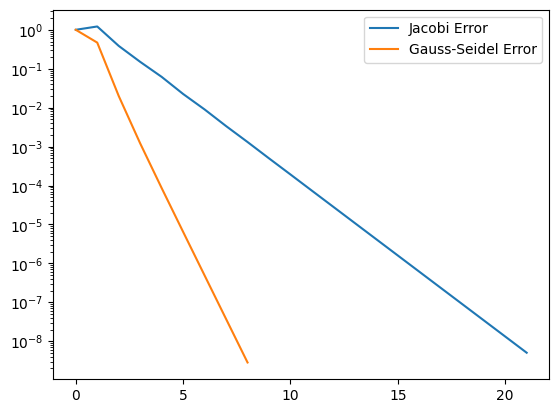

Raggio spettrale di T: (0.503375852437678+0j)
Norma ad infinito di T: 0.75
Raggio spettrale di T: (0.11458333333333331+0.05947542676508414j)
Norma ad infinito di T: 0.6000000000000001


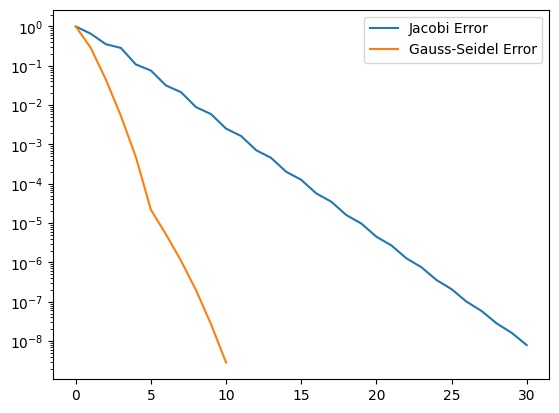

In [4]:
A1=np.array([[8,1,3],[3,5,1],[1,1,17]],dtype=float)
A2=np.array([[3,0, 4],[7, 4, 3],[-1, -1 ,-2]],dtype=float)
A3=np.array([[1,3,2],[7,8,3],[14,3,10]],dtype=float)
A4=np.array([[5, 0, -1, 2],[ -2, 4, 1, 0],[0, -1, 4, -1],[ 2, 0, 0, 3]],dtype=float)
A5=np.array([[9,1,16],[1,11,1],[16,1,29]],dtype=float)
matrices = [A1, A2, A3, A4, A5]
bs = []
x0s = []

def is_striclty_diagonal_dominant(A):
    d = np.diag(np.abs(A))
    row_sum = np.sum(np.abs(A), axis=1) - d
    return np.all(d > row_sum)

for matrix in matrices:
    bs.append(np.sum(matrix, axis=1))
    x0s.append(np.zeros(matrix.shape[0]))

for matrix, b, x0 in zip(matrices, bs, x0s):
    if is_striclty_diagonal_dominant(matrix):
        jac_res = jacobi(matrix, b, x0, toll, 10_000)
        gaus_res = gauss_seidel(matrix, b, x0, toll, 10_000)
        plt.semilogy(
            range(len(jac_res[1])), jac_res[1],
            range(len(gaus_res[1])), gaus_res[1]
        )
        plt.legend(["Jacobi Error", "Gauss-Seidel Error"])
        plt.show()

## Esercizio 4
Implementare la  funzione $gauss$_$seidel$_sor(A,b,x0,omega, toll,itmax) per risolvere il  sistema lineare Ax=b utilizzando il Metodo iterativo di Gauss-Seidel-SOR
La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- omega: il parametro di rilassamento
- toll: tolleranza per il criterio di arresto
- itmax: iterazioni massime oltre le quali il metodo si ferma

Restituisce in output
- la soluzione x
- l'errore ad ogni iterazione calcolato come $||x^{(k)}-x^{(k-1)}||/||x^{(k)}||$

Calcola
- d= np.diag(A) #Estrae la diagonale di A in un 1d numpy array
- D=np.diag(d) #Costruisce la matrice diagonale avente d come elementi della diagonale.
- E=np.tril(A,-1) #Costruisce la matrice E, formata dagli elementi della matrice A sotto la diagonale 
                 principale esclusi gli elementi diagonali (vedi teoria)
- F=np.triu(A,1) #Costruisce la matrice F, formata dagli elementi della matrice A sopra la diagonale 
                 principale esclusi gli elementi diagonali (vedi teoria)
- il raggio spettrale della matrice di iterazione $T(\omega)$$ (vedi dispense per la formula della matrice di iterazione T nel caso di Gauss_Seidel SOR) e la sua norma infinito e li stampa.

- Implementare in formato  matriciale, l'aggiornamento della soluzione ad ogni iterazione con i seguenti passi:

  -  calcolare 
  $$\tilde{x}^{(k)}$$
  come soluzione del sistema triangolare inferiore (usa Lsolve per risolverlo) con matrice dei coefficienti (D+E) e termine noto $b-Fx^{(k-1)}$ (vedi Teoria)
  $$(D+E) \tilde{x}^{(k)}= b-Fx^{(k-1)}$$

  - la soluzione al passo k di Gauss Seidel SOR sarà quindi calcolata come 
  $$x^{(k)}= (1-\omega)x^{(k-1)}+\omega \tilde{x}^{(k)}$$

Indicato con $x^{(0)}$ un vettore casuale di n componenti (n è l'ordine della matrice), il procedimento iterativo per il calcolo della soluzione del sistema lineare consiste nell'iterare il segeunte schema fino a quando non venga soddisfatto il criterio di arresto:

$$(D+E) \tilde{x}^{(k)}= b-Fx^{(k-1)}$$
$$x^{(k)}= (1-\omega)x^{(k-1)}+\omega  \tilde{x}^{(k)}$$

Implementare un criterio di arresto per il procedimento iterativo in termini di : $||x^{(k)}-x^{(k-1)}||/||x^{(k)}|| <toll$

In [5]:
def gauss_seidel_sor(A, b, x0, omega, toll, maxit):
    x_curr, x_prev = None, x0
    errors = []
    stop = False

    # Scomposizione A = M - N
    # M = E + D
    # N = -F
    d = np.diag(A)
    D = np.diag(d)
    E = np.tril(A, -1)
    F = np.triu(A, 1)

    M = E + D
    N = -F

    T = np.linalg.inv(M) @ N
    q = np.linalg.inv(M) @ b

    spectral_ray = np.max(np.linalg.eigvals(T))
    print(f"Raggio spettrale di T: {spectral_ray}")
    
    infty_norm = np.linalg.norm(T, ord=np.inf)
    print(f"Norma ad infinito di T: {infty_norm}")
    
    while not stop:
        x_mod = T @ x_prev + q
        x_curr = (1 - omega) * x_prev + omega * x_mod
        
        error_curr = np.linalg.norm(x_curr - x_prev, np.inf) / np.linalg.norm(x_curr, np.inf)
        errors.append(error_curr)
        
        if error_curr <= toll or len(errors) > maxit:
            stop = True
        else:
            x_prev = x_curr
    
    return x_curr, errors

A = np.array([
    [8,1,3],
    [3,5,1],
    [1,1,17]
], dtype=float)
b = np.sum(A, axis=1)
x0 = np.zeros(A.shape[0])
omega = .2
toll = 1e-10
gauss_seidel_sor(A, b, x0, omega, toll, 100)

Raggio spettrale di T: 0.07631935991363357
Norma ad infinito di T: 0.5


(array([1., 1., 1.]),
 [np.float64(1.0),
  np.float64(0.42402168388954764),
  np.float64(0.23635037458219904),
  np.float64(0.14583598450207955),
  np.float64(0.09420357208153837),
  np.float64(0.071102935583835),
  np.float64(0.0559197276316642),
  np.float64(0.0446312503005249),
  np.float64(0.03597885449495084),
  np.float64(0.029202293310152238),
  np.float64(0.023812493621211864),
  np.float64(0.019478268771987294),
  np.float64(0.015965604440481826),
  np.float64(0.013103193275744074),
  np.float64(0.010761919370773428),
  np.float64(0.00884213777697266),
  np.float64(0.007265492181763099),
  np.float64(0.005969467311345742),
  np.float64(0.004903639986168294),
  np.float64(0.0040270154962579454),
  np.float64(0.003306077045350433),
  np.float64(0.002713317338692491),
  np.float64(0.0022261060520796542),
  np.float64(0.001874255894698301),
  np.float64(0.0016458140063087543),
  np.float64(0.0014351959073465818),
  np.float64(0.0012441129662474108),
  np.float64(0.0010729466459798

## Esercizio 5
Scrivere una funzione creaPoisson(n) che preso in input l'ordine della matrice quadrata di Poisson la costruzione secondo la seguente formula:
$$A =
\left [
\begin{array}{ccccccccccc}
4 & -1 & 0 & -1 &0 &0 & 0& 0& \cdots &   0 & 0\\
-1 & 4 & -1 & 0  &-1 &0 & 0& 0& \cdots &   0 & 0\\
0 & -1 & 4 & -1  &0 &-1 & 0& 0& \cdots &   0 & 0 \\
-1 & 0 & -1 & 4  &-1 &0  & -1 & 0& \cdots &   0 & 0\\
0 & -1 & 0 & -1  & 4 &-1 & 0 & -1& \cdots &   0 & 0\\
0 & 0 & -1 & 0  & -1 &4 & -1 & 0&  -1 & 0 & 0 \\
0 & 0 & 0 & \ddots  & 0 &\ddots & \ddots & \ddots& \ddots & \ddots & 0\\
0 & 0 & 0 & 0  & -1 &0  & -1 & 4& -1 &   0& -1\\
\end{array}
 \right ], \qquad
$$
- Risolvere il sistema lineare Ax=b con matrice dei coefficienti A di Poisson di ordine 10 e termine noto b scelto in maniera tale che il sistema abbia soluzione il vettore x con tutte le componenti  uguali ad 1, utilizzando  il metodo iterativo di Jacobi, Gauss-Seidel e Gauss-Seidel-Sor con parametro omega scelto tra 1 e 2 in maniera tale che il raggio spettrale della matrice di iterazione sia il più piccolo possibile e confrontare su un unico grafico l'andamento degli errori in scala logaritmica. Usare toll=1e-10.

Raggio spettrale di T: 0.8451732757464325
Norma ad infinito di T: 1.0
Raggio spettrale di T: (0.7185579379397853+0j)
Norma ad infinito di T: 0.9166259765625
Raggio spettrale di T: (0.7185579379397853+0j)
Norma ad infinito di T: 0.9166259765625


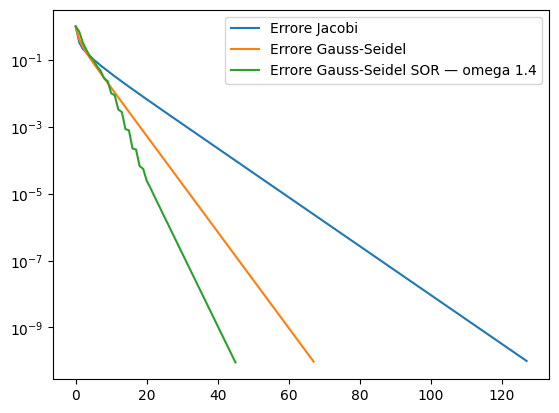

In [7]:
def creaPoisson(n):
    main_d = np.zeros(n) + 4
    lower_d = np.zeros(n - 1) - 1
    upper_d = lower_d
    lower_lower_d = np.zeros(n - 3) - 1
    upper_upper_d = lower_lower_d
    A1 = np.diag(main_d)
    A2 = np.diag(lower_d, k=-1)
    A3 = np.diag(upper_d, k=1)
    return A1 + A2 + A3 + np.diag(upper_upper_d, k=3) + np.diag(lower_lower_d, k=-3)

n = 10
A = creaPoisson(n)
b = np.sum(A, axis=1)
x0 = np.zeros(A.shape[0])
toll = 1e-10
omega = 1.4

jac_res = jacobi(A, b, x0, toll, 1_000)
gs_res = gauss_seidel(A, b, x0, toll, 1_000)
gs_sor_res = gauss_seidel_sor(A, b, x0, omega, toll, 1_000)

plt.semilogy(
    range(len(jac_res[1])), jac_res[1],
    range(len(gs_res[1])), gs_res[1],
    range(len(gs_sor_res[1])), gs_sor_res[1]
)
plt.legend([
    "Errore Jacobi", 
    "Errore Gauss-Seidel", 
    f"Errore Gauss-Seidel SOR — omega {omega}"
])
plt.show()